# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


## Loading  Mtree 

In [3]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pd.read_pickle(file)

In [4]:
with open ('Feature.pickle', 'rb') as file:
    feature_scores = pickle.load(file)
 

In [5]:
with open ('Models.pickle', 'rb') as file:
    model_details = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, and TOC.

In [6]:
# feature_scores = {}

# model_details ={}

In [60]:
HMtree['Clay']['ridge']['none']['log'][90]

{'bp': {'alpha': 1e-05},
 'X_test':           411       435       458       481       505       528       551  \
 321  2.018709  1.876397  1.757884  1.684312  1.587240  1.486234  1.391521   
 70   2.309530  2.152855  2.022881  1.929344  1.815295  1.702041  1.602954   
 209  2.075896  1.898786  1.766535  1.699672  1.577742  1.448549  1.339268   
 549  1.851693  1.722781  1.610704  1.545912  1.457004  1.357653  1.267360   
 712  2.018571  1.898046  1.790991  1.714089  1.624516  1.535976  1.457532   
 ..        ...       ...       ...       ...       ...       ...       ...   
 371  1.718910  1.563639  1.438326  1.371406  1.278443  1.178006  1.094231   
 430  2.189633  2.080181  1.974191  1.901834  1.811472  1.716697  1.627019   
 292  1.711179  1.618942  1.541984  1.481494  1.416589  1.355303  1.299844   
 412  2.237143  2.115072  2.009203  1.930120  1.837719  1.746214  1.661785   
 746  1.687246  1.604562  1.525363  1.457981  1.397046  1.338476  1.282617   
 
           575       598   

## Clay 

### Cubist

Clay -> [ r2 - **0.90**, Spec - fod_log, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the first order derivative of the logarithmic transformed  spectra which was resampled to 70 bands.


In [8]:
fod_log[70] = fod_log[70].copy()
T[0] = T[0].copy()

In [9]:
clay_model_cubist = Cubist(n_committees = 20, n_rules = 10) 
clay_model_cubist.fit(fod_log[70],  T[0])

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())


Cubist(n_committees=20, n_rules=10)

In [21]:
#feature_scores['Clay'] = permutation_importance(clay_model_cubist, fod_log[70], T[0], n_repeats=10, random_state=0)

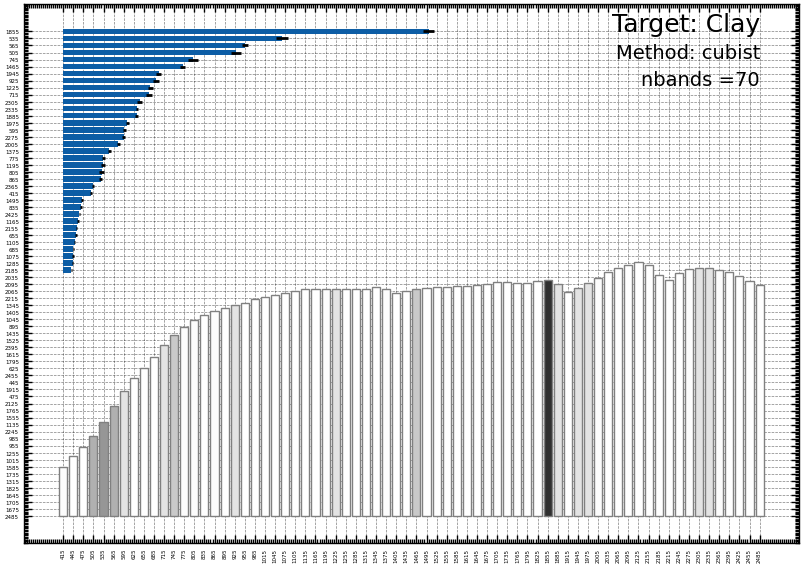

In [11]:
model_details['Clay'] = {'method': 'cubist', 'spec': sampled_spec[70], 'spec_proc': 'fod_log', 'n_bands': 70}
show_important_features_for ('Clay', model_details, feature_scores, 20, 80, 2)

### Kernel Ridge Regression

Clay -> [ r2 - **0.88**, Spec - log, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the
 logarithmic transformed spectra  which is resampled to 70 bands.


In [12]:
sampled_log[70] = sampled_log[70].copy()
T[0] = T[0].copy()

In [13]:
clay_model_kernelridge = KernelRidge(alpha = 0.00001) 
clay_model_kernelridge.fit(sampled_log[70],  T[0])

KernelRidge(alpha=1e-05)

In [14]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log[70], T[0], n_repeats=20, random_state=0)

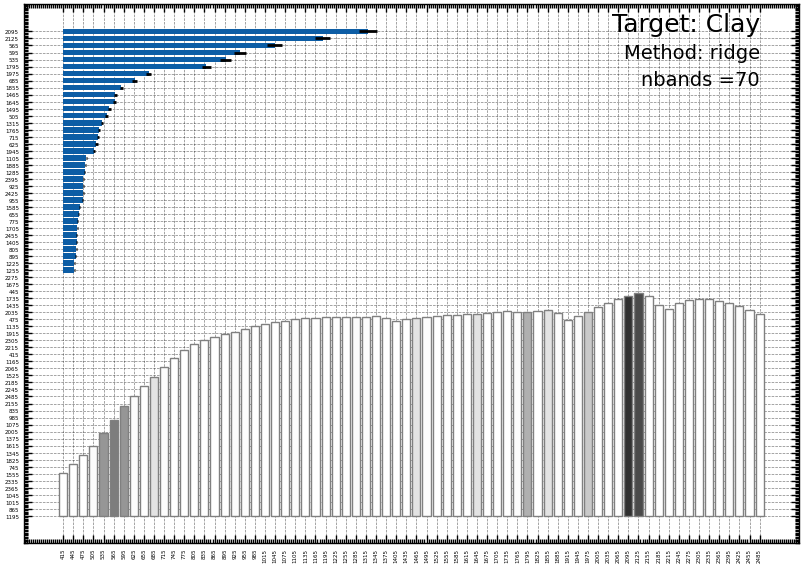

In [15]:
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_spec[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('Clay', model_details, feature_scores, 0.01, 70, 2)

In [16]:
# with open ('Feature.pickle', 'wb') as file:
#     pickle.dump(feature_scores, file)
     

In [17]:
# with open ('Models.pickle', 'wb') as file:
#     pickle.dump(model_details, file)

In [18]:
#Plotting Model Accuracy (ipywidgets)
def plot_model_acc (method, target, spec_preprocessing, n_bands):
    
    m = method
    t = target
    
    i = target_names.index(target)    
    
    p = spec_preprocessing
    n = n_bands
    tp = 'none'
    
    Y = HMtree[t][m][tp][p][n]
    
    y_test = Y['y_test']
    y_pred = Y['y_testP']
    L1y_pred = Y['L1y_testP']
    L1y_test = Y['L1y_test']

    y_train = Y['y_train']
    yhat_pred = Y['y_trainP']
    

    
    if m == 'plsr':
        y_pred = y_pred[:,0]
        #L1y_pred = L1y_pred[:,0]

    
    iqrp_test = Y['iqrp_test']
    r2_test = Y['r2_test']
    rpd_test = Y['rpd_test']

    #iqrp_train = find_iqrp(yhat_pred, y_train)
    r2_train = Y['r2_train']
    #rpd_train = find_rpd(yhat_pred, y_train)
    
    L1iqrp_test = Y['L1iqrp_test']
    L1r2_test = Y['L1r2_test']
    L1rpd_test = Y['L1rpd_test']
    
    y_tp = pd.DataFrame({'actual':y_test.values, 'predic': y_pred})
    z = np.polyfit(y_test, y_pred, 1)

    yhat_tp = pd.DataFrame({'actual':y_train.values, 'predic': yhat_pred})
    zhat = np.polyfit(y_train, yhat_pred, 1)
    
    L1y_tp = pd.DataFrame({'actual':L1y_test.values, 'predic': L1y_pred})
    L1z = np.polyfit(L1y_test, L1y_pred, 1)
    
    fig, axes = plt.subplots(2,2, figsize=(18,16))
    
    #with plt.style.context(('ggplot')): ---- PLOT of test-prediction --------------------------------------
    y_tp.plot.scatter(ax= axes[0][0], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[0][0].plot(y_test, np.polyval(z, y_test),  c='blue', linewidth=1)
    axes[0][0].plot(y_test, y_test, color='green', linewidth=1)
    axes[0][0].tick_params(axis='both', labelsize=10)
    axes[0][0].text(0.05, 0.95, target_names[i]+' (Test Score)', transform=axes[0][0].transAxes, fontsize = 20, color = clr[i])
    axes[0][0].text(0.05, 0.90, 'IQRP ={:.2f}'.format(iqrp_test), transform=axes[0][0].transAxes, fontsize = 16)
    axes[0][0].text(0.05, 0.85, 'RPD ={:.2f}'.format(rpd_test), transform=axes[0][0].transAxes, fontsize = 16)
    axes[0][0].text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(r2_test,3)), transform=axes[0][0].transAxes, fontsize = 16)
    axes[0][0].text(0.95, 0.15, 'Method: '+method, transform=axes[0][0].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    
    L1y_tp.plot.scatter(ax= axes[0][1], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[0][1].plot(L1y_test, np.polyval(L1z, L1y_test),  c='blue', linewidth=1)
    axes[0][1].plot(L1y_test, L1y_test, color='green', linewidth=1)
    axes[0][1].tick_params(axis='both', labelsize=10)
    axes[0][1].text(0.05, 0.95, target_names[i]+' (L1-out Score)', transform=axes[0][1].transAxes, fontsize = 20, color = clr[i])
    axes[0][1].text(0.05, 0.90, 'IQRP ={:.2f}'.format(L1iqrp_test), transform=axes[0][1].transAxes, fontsize = 16)
    axes[0][1].text(0.05, 0.85, 'RPD ={:.2f}'.format(L1rpd_test), transform=axes[0][1].transAxes, fontsize = 16)
    axes[0][1].text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(L1r2_test,3)), transform=axes[0][1].transAxes, fontsize = 16)
    axes[0][1].text(0.95, 0.15, 'Method: '+method, transform=axes[0][1].transAxes, 
                    horizontalalignment='right', fontsize = 20)

    
     #------------------------ Ploting R2 Vs N_bands-----------------------------------
    
    #--- data for creating n_bands vs r2 scores plot -------------------------------
    
    pY = HMtree[t][m]['none'][p]        
    X = nbands_sampling
    
    Yr2 = []
    L1Yr2 = []
    
    for j in X:
        Yr2.append(pY[j]['r2_test'])
        L1Yr2.append(pY[j]['L1r2_test'])  
   
    j = 0
    while j < len(Yr2): 
        if Yr2[j] <= 0:
            Yr2[j] = 0
        if L1Yr2[j] <= 0:
            L1Yr2[j] = 0
        j = j + 1
 
    #------------------------------ STEM PLOT ---- for accuracy Vs n_bands ---------------------------------- 
    
    #with plt.style.context(('ggplot')): ---- PLOT of test-prediction --------------------------------------
    yhat_tp.plot.scatter(ax= axes[1][0], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[1][0].plot(y_train, np.polyval(zhat, y_train),  c='blue', linewidth=1)
    axes[1][0].plot(y_train, y_train, color='green', linewidth=1)
    axes[1][0].tick_params(axis='both', labelsize=10)
    axes[1][0].text(0.05, 0.95, target_names[i]+' (Train Score)', transform=axes[1][0].transAxes, fontsize = 20, color = clr[i])
    #axes[1][0].text(0.05, 0.90, 'IQRP ={:.2f}'.format(iqrp_train), transform=axes[1][0].transAxes, fontsize = 16)
    #axes[1][0].text(0.05, 0.85, 'RPD ={:.2f}'.format(rpd_train), transform=axes[1][0].transAxes, fontsize = 16)
    axes[1][0].text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(r2_train,3)), transform=axes[1][0].transAxes, fontsize = 16)
    axes[1][0].text(0.95, 0.15, 'Method: '+method, transform=axes[1][0].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    
    
    axes[1][1].stem(X,L1Yr2)
    axes[1][1].tick_params(axis='both', labelsize=10)
    axes[1][1].text(0.00, 1.01,  target_names[i], transform=axes[1][1].transAxes,fontsize = 20, color = clr[i])
    axes[1][1].text(0.99, 1.01, 'Spec_prep: '+ p, transform=axes[1][1].transAxes, horizontalalignment='right', fontsize = 16)
    axes[1][1].text(0.17, 1.01, '(L1-out)', transform=axes[1][1].transAxes, horizontalalignment='left', fontsize = 16)
    axes[1][1].text(0.60, -0.1, 'n_bands', transform=axes[1][1].transAxes, horizontalalignment='right', fontsize = 16)
    axes[1][1].text(-0.1, 0.5, 'R2 Scores', horizontalalignment='left', verticalalignment='center', \
                rotation='vertical', transform=axes[1][1].transAxes, fontsize = 16)
        
   
    return    

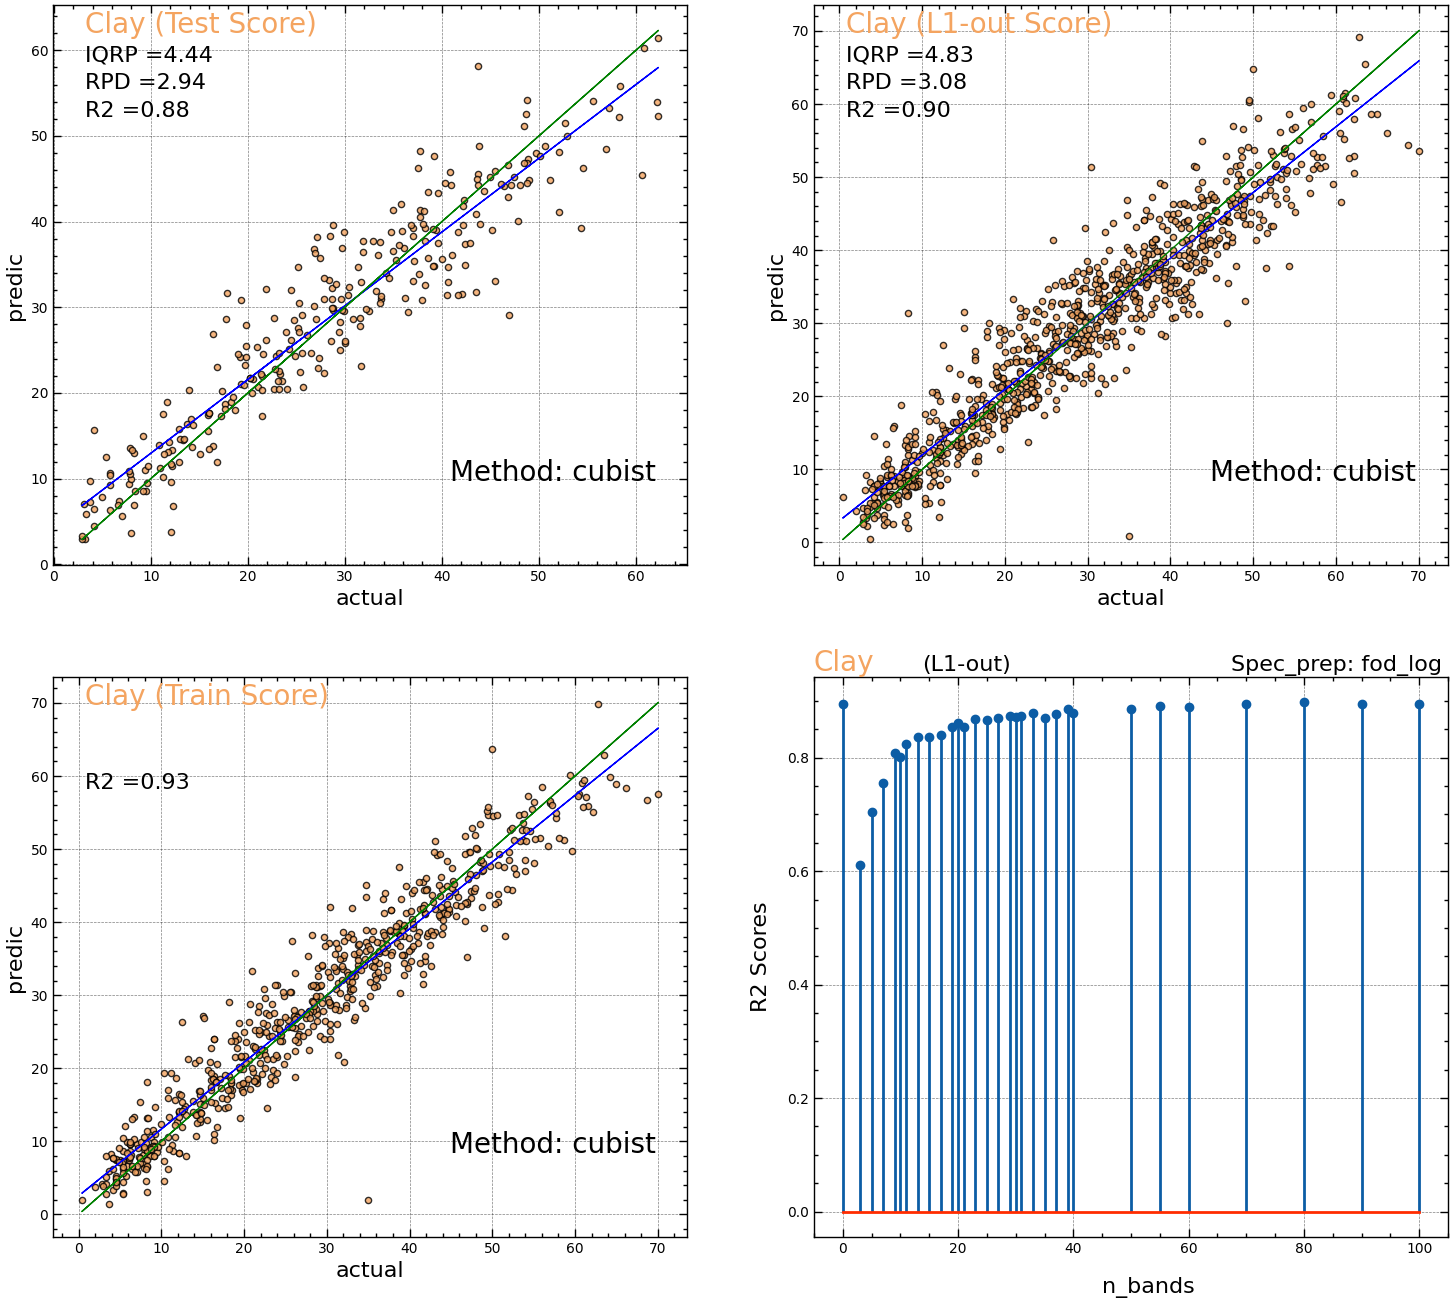

In [20]:
plot_model_acc ('cubist', 'Clay', 'fod_log', 70)